# Generate synthetic crab data

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.stats import poisson, binom

## Global user settings

In [2]:
N_MONTHS = 36
LAT1 = 37.02606
LAT2 = 37.1

LONG1 = -8.01873
LONG2 = -8.62

In [3]:
data_raw_path = os.path.join(os.getcwd(), '../data-raw')
os.listdir(data_raw_path)

['rf_w_q2.csv',
 'quadrats.xlsx',
 'rf_s_q2.csv',
 'Ria de Alvor.xlsx',
 'rf_s_q1.csv',
 'rf_w_q1.csv']

In [4]:
d1 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q1.csv'))
d2 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q2.csv'))

d3 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q1.csv'))
d4 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q2.csv'))

In [5]:
d1.head()

,cl,lcl,fw,species,longitude,is_gravid,rcl,stage,sex,id,cw,latitude
0,21,16,15,A. farensis,-8.01873,False,10,juvenile,?,1,27,37.02606
1,21,13,16,A. farensis,NaN,False,15,juvenile,?,2,27,NaN
2,15,9,10,A. farensis,NaN,True,5,juvenile,female,3,19,NaN
3,21,16,19,A. farensis,NaN,False,14,juvenile,male or female,4,26,NaN
4,19,8,14,A. farensis,NaN,False,7,juvenile,female,5,24,NaN


In [6]:
list(d1.stage.unique()), list(d2.stage.unique()), list(d1.is_gravid.unique()), list(d4.stage.unique())

(['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 [np.False_, np.True_],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'])

## Dates

In [7]:
start_year = 2020
months = pd.date_range(start=f'{start_year}-01-01', periods=N_MONTHS, freq='MS')  # Start of each month

# Generate random day for each month
random_dates = [
    pd.Timestamp(year=dt.year, month=dt.month, day=np.random.randint(1, dt.days_in_month + 1))
    for dt in months
]

# Convert to pandas Series or DataFrame
random_dates = pd.Series(random_dates, name="random_monthly_date")
# print(random_dates)

# basis for the number of observations

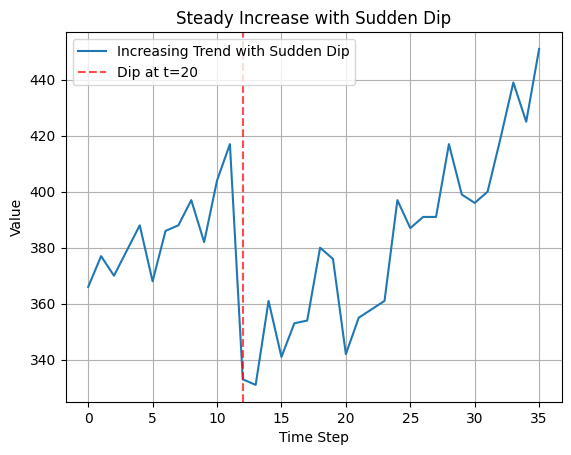

In [8]:
# Parameters
n_points = N_MONTHS
slope = 0.15
dip_time = 12
dip_magnitude = -80  # Negative for a dip
noise_std = 13.2

# Time vector
t = np.arange(n_points)

# Linear increasing trend
trend = slope * t + 12

# Sudden dip
dip = np.zeros(n_points)
dip[dip_time:] = dip_magnitude

# Add some Gaussian noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs1 = 30 * trend + noise + dip
n_crabs1 = n_crabs1.astype(int)

# Plot
plt.plot(t, n_crabs1, label='Increasing Trend with Sudden Dip')
plt.axvline(dip_time, color='red', linestyle='--', alpha=0.7, label='Dip at t=20')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Steady Increase with Sudden Dip')
plt.show()

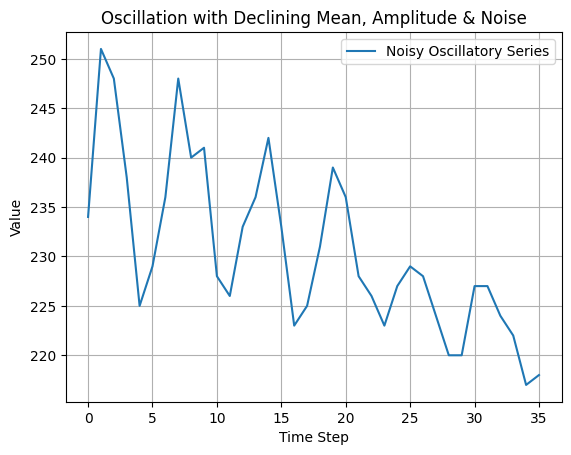

In [9]:
# Parameters
n_points = N_MONTHS
period = 6
initial_amplitude = 15
initial_mean = 240
decline_rate = 0.5
amplitude_decay_rate = 0.05
noise_std = 3.0

# Time vector
t = np.arange(n_points)

# Declining mean
mean_trend = initial_mean - decline_rate * t

# Changing amplitude over time
amplitude = initial_amplitude * np.exp(-amplitude_decay_rate * t)

# Oscillatory component with variable amplitude
oscillation = amplitude * np.sin(2 * np.pi * t / period)

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs2 = mean_trend + oscillation + noise
n_crabs2 = n_crabs2.astype(int)

# Plot
plt.plot(t, n_crabs2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Oscillation with Declining Mean, Amplitude & Noise')
plt.show()

## Temp

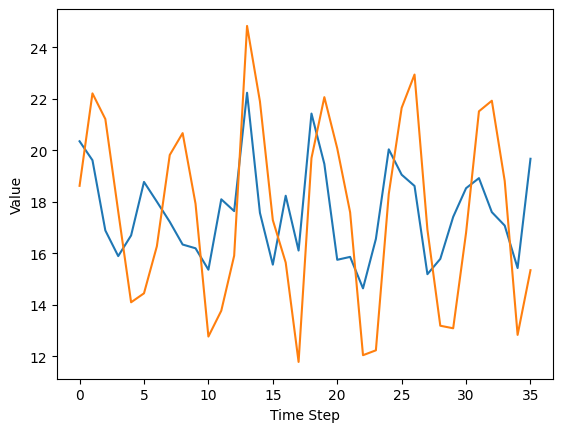

In [13]:
# Parameters
n_points = N_MONTHS
period = 6
amplitude1 = 2
amplitude2 = 5
initial_mean = 18
noise_std = 1.5

# Time vector
t = np.arange(n_points)

# Oscillatory component with variable amplitude
oscillation2 = amplitude2 * np.sin(2 * np.pi * t / period)
oscillation1 = amplitude1 * np.sin(2 * np.pi * t / period + np.pi / 3)  # Phase shift

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
t1 = initial_mean + oscillation1 + noise
t2 = initial_mean + oscillation2 + noise

# Plot
plt.plot(t, t1, label='Noisy Oscillatory Series')
plt.plot(t, t2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [14]:
texts = [
    "Crab moving quickly across rocks.",
    "Slow movement near seagrass patches.",
    "Claw waving directed at nearby crab.",
    "Burrowing into sandy sediment.",
    "Feeding on small mollusks.",
    "Climbing algae-covered rocks.",
    "Mating behavior with antenna touching.",
    "Resting under shell fragment.",
    "Retreating quickly from shadow.",
    "Cleaning claws with rubbing motion.",
    "Guarding a small hole in sediment.",
    "Sideways walking along bay edge.",
    "Territorial display against intruder.",
    "Camouflaging with surrounding mud.",
    "Foraging among seagrass roots.",
    "Interacting with small fish nearby.",
    "Escaping predator silhouette overhead.",
    "Claw snapping in competition.",
    "Inspecting discarded crab shell.",
    "Vibrating antennae in water currents.",
    "Moving toward bait.",
    "Struggling with entangled seaweed.",
    "Pausing frequently during exploration.",
    "Social contact with other crabs.",
    "Dragging shell fragment backward.",
    "Hiding under floating debris.",
    "Climbing onto submerged logs.",
    "Searching for food in tidal pools.",
    "Resting in shaded rock crevice.",
    "Swimming short distance to escape.",
    "Picking algae from rock surface.",
    "Hiding in sandy burrow.",
    "Climbing vertical rock face.",
    "Feeding on detritus in shallow water.",
    "Moving sideways along sandy bottom.",
    "Using claws to dig into sediment.",
    "Exploring new territory.",
    "Hiding under seagrass blades.",
    "Picking detritus from seabed.",
    "Defensive posture when approached.",
    "Climbing submerged rocks.",
    "Exchanging antenna taps.",
    "Scavenging near tidal pools.",
    "Rapid claw movement while feeding.",
    "Retreating into burrow.",
    "Emerging cautiously from hiding.",
    "Color changes during molting.",
    "Waving claws rhythmically.",
    "Half buried in sand.",
    "Searching for mates at twilight.",
    "Feeding on algae scraped from rocks.",
    "Sitting still blending with environment.",
    "Climbing barnacle-covered surfaces.",
    "Stillness in cold water.",
    "Rapid crossing of open sand.",
    "Interaction with hermit crabs.",
    "Picking biofilm on submerged wood.",
    "Escaping from aggressive fish.",
    "Guarding eggs under abdominal flap.",
    "Moving toward warmer water pockets.",
    "Climbing seaweed stalks.",
    "Shaking claws after contact.",
    "Displaying dominance by lifting body.",
    "Feeding on small crustaceans.",
    "Hiding beneath rocks.",
    "Moving in groups.",
    "Claw snapping at diver.",]

associated_species = [
    "Sea Star",
    "Hermit Crab",
    "Small Fish",
    "Snail",
    "Shrimp",
    "Barnacle",
    "Sea Anemone",
    "Sea Urchin",
    "Algae",
    "Polychaete Worm",
    "Mussel",
    "Coral Fragment",
    "Jellyfish",
    "Sea Sponge",
    "Crab (Other Species)",
]

## I need to generate crab by crab, not column by column

In [78]:
def random_associated_species(species_list, min_items=1, max_items=5):
    n = random.randint(min_items, max_items)
    return random.sample(species_list, n)

def generate_noisy_poisson(mu, cutoff=5, mult=6):
    """    Generate a noisy sample from a Poisson distribution, apply a linear transformation,
    and filter out values below a specified cutoff.
    """
    samples = poisson.rvs(mu=mu, size=1000)
    noise = np.random.normal(loc=0, scale=1.0, size=samples.shape)
    noisy_samples = mult*(samples + noise)
    # cut values less than X
    noisy_samples = noisy_samples[noisy_samples >= cutoff].astype(int)
    return noisy_samples


def generate_noisy_normal(mu, sigma=1.0):
    """
    Generate a sample from a normal distribution, apply a linear transformation,
    and filter out values below a specified cutoff.

    Parameters:
        mu (float): Mean of the normal distribution.
        sigma (float): Standard deviation of the normal distribution.
        cutoff (float): Minimum value threshold after transformation.

    Returns:
        np.ndarray: Filtered and scaled samples as integers.
    """
    samples = np.random.normal(loc=mu, scale=sigma, size=1000)
    # samples = samples[samples <= cutoff].astype(int)
    return samples.astype(int)

### R Formosa

In [140]:
species = ['A farensis', 'A. Farensis', 'U. olhanensis', 'u. olhanen.', 'Ucides alvorensis']
lst_sex = ['female', 'male', 'male or female', ' ', '-', np.nan, 'N/R']
lst_stage = ['juvenile', 'pre_puberty', 'sub_adult', 'adult']
lst_stage2 = ['j', 'p', 's', 'a']


# different probabilities for each species
psex_far=[0.45, 0.47, 0.02, 0.01, 0.02, 0.01, 0.02]
psex_olh=[0.48, 0.47, 0.01, 0.01, 0.01, 0.01, 0.01]
psex_alv=[0.3, 0.3, 0.2, 0.05, 0.05, 0.05, 0.05]


In [141]:
mus_formosa = np.linspace(2, 5, N_MONTHS)
cutoffs_formosa = np.linspace(4, 7, N_MONTHS)

mus_formosa_fw = np.linspace(50, 20, N_MONTHS)
# cutoffs_formosa_fw = np.linspace(5, 10, N_MONTHS)

In [142]:
from tqdm import tqdm

In [143]:
for idx in tqdm(range(N_MONTHS)):
# for idx in range(2):

    date = random_dates[idx]  # Use the first random date for all crabs
    count = 0
    df = pd.DataFrame(columns=['species', 'sex', 'stage'])

    pstage_far=[0.15-idx*0.001, 0.2, 0.3+idx*0.001, 0.4-idx*0.002]
    total = sum(pstage_far)
    pstage_far = [x / total for x in pstage_far]  # Normalize to sum to 1

    pstage_olh=[0.15-idx*0.002, 0.2, 0.3-idx*0.001, 0.4+idx*0.002]
    total = sum(pstage_olh)
    pstage_olh = [x / total for x in pstage_olh]  # Normalize to sum to 1
    pstage_alv=[0.25-idx*0.001, 0.3, 0.25+idx*0.001, 0.25]
    total = sum(pstage_alv)
    pstage_alv = [x / total for x in pstage_alv]  # Normalize to sum to 1

    # make gravid crabs probabilistic
    p_gravid = [0.3 * (1 + 0.01 * idx), 0.7 * (1 - 0.01 * idx)]
    total = sum(p_gravid)
    p_gravid = [x / total for x in p_gravid]  # Normalize to sum to 1


    # numerical cols
    cl = generate_noisy_poisson(mus_formosa[idx], cutoff=int(cutoffs_formosa[idx]))
    fw = generate_noisy_normal(mus_formosa_fw[idx], sigma=1.0)


    # Parameters
    n_trials = 18      # number of trials per sample
    p_success = 0.45   # probability of success
    n_samples = 1000   # number of samples to generate

    # Generate samples

    dep = binom.rvs(n=n_trials, p=p_success, size=n_crabs1[idx])

    # quartiles
    dep_quartiles = np.percentile(dep, [20, 50, 65, 85])
    # map quartiles to factors in dictionary
    quartile_factors = {
        'Q1': 0.9,
        'Q2': 1.0,
        'Q3': 1.2,
        'Q4': 1.5
    }

    for i in range(n_crabs1[idx]):
        crab_dict = {
            'species': np.random.choice(species, p=[0.2, 0.16, 0.25, 0.31, 0.08]),
        }
        if crab_dict['species'][0] == 'A':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_far)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_far)

        elif crab_dict['species'][:2] == 'Uc':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_alv)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_alv)
        else:
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_olh)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_olh)

        if crab_dict['sex'] == 'female':
            crab_dict['is_gravid'] = np.random.choice([True, False], p=p_gravid)
        else:
            if i % 10 == 0:  # every 10th crab is gravid
                crab_dict['is_gravid'] = True

        crab_dict['behaviour'] = np.random.choice(texts, replace=True)
        crab_dict['associated_species'] = random_associated_species(associated_species)
        crab_dict['depth [m]'] = dep[i]

        factor = quartile_factors['Q1'] if dep[i] <= dep_quartiles[0] else \
            quartile_factors['Q2'] if dep[i] <= dep_quartiles[1] else \
            quartile_factors['Q3'] if dep[i] <= dep_quartiles[2] else \
            quartile_factors['Q4'] if dep[i] <= dep_quartiles[3] else 1.0

        # pick from quartily based on the stage
        if crab_dict['stage'] == 'juvenile':
            crab_dict['cl [mm]'] = cl[i] * 0.5  # Juveniles are smaller
            # make 'cw correlated with 'cl' for juveniles
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.6, 1.4)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'pre_puberty':
            crab_dict['cl [mm]'] = cl[i] * 0.75  # Pre-puberty crabs are medium-sized
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.7, 1.3)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'sub_adult':
            crab_dict['cl [mm]'] = cl[i] * 1.25  # Sub-adults are larger
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.8, 1.2)  # Randomly vary the correlation

        else:
            crab_dict['cl [mm]'] = cl[i] * 1.5  # Adults are the largest
            crab_dict['cw [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(0.9, 1.1)  # Randomly vary the correlation


        if crab_dict['sex'] == 'female':
            # multiply by a factor to simulate smaller size
            crab_dict['cl [mm]'] *= np.random.uniform(0.7, 0.9)
            crab_dict['cw [mm]'] *= np.random.uniform(0.8, 0.85)

        crab_dict['lcl [mm]'] = crab_dict['cw [mm]'] * np.random.uniform(1.2, 1.5)
        crab_dict['rcl [mm]'] = crab_dict['cl [mm]'] * np.random.uniform(1.0, 1.1)


        crab_dict['fw [mm]'] = fw[i]
        crab_dict['date'] = date
        crab_dict['latitude'] = None
        crab_dict['longitude'] = None

        crab_dict['id'] = count
        count += 1
        df = pd.concat([df, pd.DataFrame([crab_dict])], ignore_index=True)
    df['id'] = df['id'].astype(int)
    df.loc[0, 'latitude'] = LAT1
    df.loc[0, 'longitude'] = LONG1
    df.reset_index(inplace=True, drop=True)

    filename = f'{str(date.date())}_rf.csv'
    df.to_csv(filename)#, index=False)

100%|██████████| 36/36 [00:26<00:00,  1.38it/s]


In [144]:
df

,species,sex,stage,is_gravid,behaviour,associated_species,depth [m],cl [mm],cw [mm],lcl [mm],rcl [mm],fw [mm],date,latitude,longitude,id
0,U. olhanensis,female,sub_adult,True,Moving toward warmer water pockets.,"[Sea Star, Snail, Algae, Barnacle]",9.0,21.995033,26.695948,39.823108,22.417087,20.0,2022-12-03,37.02606,-8.01873,0
1,U. olhanensis,female,sub_adult,True,Picking detritus from seabed.,"[Snail, Sea Anemone, Small Fish, Sea Urchin]",8.0,23.704461,28.245712,38.259000,25.920895,20.0,2022-12-03,None,None,1
2,A farensis,nan,sub_adult,NaN,Hiding beneath rocks.,"[Sea Urchin, Hermit Crab, Snail, Crab (Other S...",10.0,42.500000,40.810459,50.096210,46.697385,20.0,2022-12-03,None,None,2
3,u. olhanen.,female,adult,True,Foraging among seagrass roots.,"[Polychaete Worm, Jellyfish, Barnacle]",6.0,22.862971,20.669515,28.373310,23.770588,21.0,2022-12-03,None,None,3
4,A. Farensis,female,adult,True,Hiding under floating debris.,"[Crab (Other Species), Snail, Jellyfish, Hermi...",9.0,46.089224,48.621007,70.999822,49.909256,20.0,2022-12-03,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,A farensis,female,sub_adult,False,Defensive posture when approached.,[Polychaete Worm],5.0,43.052520,43.791984,52.553843,43.746833,21.0,2022-12-03,None,None,446
447,A. Farensis,female,adult,True,Vibrating antennae in water currents.,"[Small Fish, Barnacle, Sea Anemone]",7.0,26.144783,26.293471,31.600132,26.873066,20.0,2022-12-03,None,None,447
448,A. Farensis,female,sub_adult,False,Retreating quickly from shadow.,"[Hermit Crab, Sea Sponge, Jellyfish, Coral Fra...",8.0,31.185770,26.793111,40.083878,32.559475,19.0,2022-12-03,None,None,448
449,U. olhanensis,male,pre_puberty,NaN,Guarding a small hole in sediment.,[Sea Anemone],10.0,6.750000,7.861121,10.928978,7.390058,19.0,2022-12-03,None,None,449


## Ria Alvor

In [145]:
species = ['A farensis', 'A. Farensis', 'U. olhanensis', 'u. olhanen.', 'Ucides alvorensis']
lst_sex = ['female', 'male', 'male or female', ' ', '-', np.nan, 'N/R']
lst_stage = ['juvenile', 'pre_puberty', 'sub_adult', 'adult']
lst_stage2 = ['j', 'p', 's', 'a']


# different probabilities for each species
psex_far=[0.43, 0.49, 0.02, 0.01, 0.02, 0.01, 0.02]
psex_olh=[0.47, 0.48, 0.01, 0.01, 0.01, 0.01, 0.01]
psex_alv=[0.35, 0.35, 0.1, 0.05, 0.05, 0.05, 0.05]

In [146]:
mus_formosa = np.linspace(3, 6, N_MONTHS)
cutoffs_formosa = np.linspace(4, 7, N_MONTHS)

mus_formosa_fw = np.linspace(40, 20, N_MONTHS)
# cutoffs_formosa_fw = np.linspace(5, 10, N_MONTHS)

In [147]:
for idx in tqdm(range(N_MONTHS)):
# for idx in range(2):

    date = random_dates[idx]  # Use the first random date for all crabs
    # extract season from date
    season = date.month
    if season in [12, 1, 2]:
        season = 'winter'
    elif season in [3, 4, 5]:
        season = 'spring'
    elif season in [6, 7, 8]:
        season = 'summer'

    count = 0
    df = pd.DataFrame(columns=['species_name', 'sex', 'stage'])

    pstage_far=[0.17+idx*0.001, 0.18, 0.33-idx*0.001, 0.37+idx*0.002]
    total = sum(pstage_far)
    pstage_far = [x / total for x in pstage_far]  # Normalize to sum to 1

    pstage_olh=[0.17-idx*0.002, 0.18, 0.33-idx*0.001, 0.37-idx*0.002]
    total = sum(pstage_olh)
    pstage_olh = [x / total for x in pstage_olh]  # Normalize to sum to 1
    pstage_alv=[0.27+idx*0.001, 0.28, 0.28+idx*0.001, 0.22]
    total = sum(pstage_alv)
    pstage_alv = [x / total for x in pstage_alv]  # Normalize to sum to 1

    # make gravid crabs probabilistic
    p_gravid = [0.2 * (1 - 0.01 * idx), 0.8 * (1 + 0.01 * idx)]
    if season == 'winter':
        p_gravid[0] *= 0.8  # Reduce probability of gravid females in winter
        p_gravid[1] *= 1.2  # Increase probability of non-gravid females in winter
    if season == 'spring':
        p_gravid[0] *= 1.2  # Increase probability of gravid females in spring
    elif season == 'summer':
        p_gravid[0] *= 1.1  # Slightly increase probability of gravid females in summer
    elif season == 'autumn':
        p_gravid[0] *= 0.9  # Slightly decrease probability of gravid females in autumn
    total = sum(p_gravid)
    p_gravid = [x / total for x in p_gravid]  # Normalize to sum to 1


    # numerical cols
    cl = generate_noisy_poisson(mus_formosa[idx], cutoff=int(cutoffs_formosa[idx]))
    fw = generate_noisy_normal(mus_formosa_fw[idx], sigma=1.0)


    # Parameters
    n_trials = 18      # number of trials per sample
    p_success = 0.35   # probability of success
    n_samples = 1000   # number of samples to generate

    # Generate samples

    dep = binom.rvs(n=n_trials, p=p_success, size=n_crabs1[idx])

    # quartiles
    dep_quartiles = np.percentile(dep, [20, 50, 65, 85])
    # map quartiles to factors in dictionary
    quartile_factors = {
        'Q1': 0.9,
        'Q2': 1.0,
        'Q3': 1.2,
        'Q4': 1.5
    }

    for i in range(n_crabs2[idx]):
        crab_dict = {
            'species_name': np.random.choice(species, p=[0.22, 0.18, 0.23, 0.29, 0.08]),
        }
        if crab_dict['species_name'][0] == 'A':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_far)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_far)

        elif crab_dict['species_name'][:2] == 'Uc':
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_alv)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_alv)
        else:
            crab_dict['sex'] = np.random.choice(lst_sex, p=psex_olh)
            crab_dict['stage'] = np.random.choice(lst_stage, p=pstage_olh)

        if crab_dict['sex'] == 'female':
            crab_dict['is_gravid?'] = np.random.choice([True, False], p=p_gravid)
        else:
            if i % 10 == 0:  # every 10th crab is gravid
                crab_dict['is_gravid?'] = True

        crab_dict['behavior'] = np.random.choice(texts, replace=True)
        crab_dict['associated_species'] = random_associated_species(associated_species)
        crab_dict['depth [m]'] = dep[i]

        factor = quartile_factors['Q1'] if dep[i] <= dep_quartiles[0] else \
            quartile_factors['Q2'] if dep[i] <= dep_quartiles[1] else \
            quartile_factors['Q3'] if dep[i] <= dep_quartiles[2] else \
            quartile_factors['Q4'] if dep[i] <= dep_quartiles[3] else 1.0

        # pick from quartily based on the stage
        if crab_dict['stage'] == 'juvenile':
            crab_dict['cl [cm]'] = cl[i] * 0.5  # Juveniles are smaller
            # make 'cw correlated with 'cl' for juveniles
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.6, 1.4)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'pre_puberty':
            crab_dict['cl [cm]'] = cl[i] * 0.75  # Pre-puberty crabs are medium-sized
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.7, 1.3)  # Randomly vary the correlation

        elif crab_dict['stage'] == 'sub_adult':
            crab_dict['cl [cm]'] = cl[i] * 1.25  # Sub-adults are larger
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.8, 1.2)  # Randomly vary the correlation

        else:
            crab_dict['cl [cm]'] = cl[i] * 1.5  # Adults are the largest
            crab_dict['cw [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(0.9, 1.1)  # Randomly vary the correlation


        if crab_dict['sex'] == 'female':
            # multiply by a factor to simulate smaller size
            crab_dict['cl [cm]'] *= np.random.uniform(0.7, 0.9)
            crab_dict['cw [cm]'] *= np.random.uniform(0.8, 0.85)

        crab_dict['lcl [cm]'] = crab_dict['cw [cm]'] * np.random.uniform(1.2, 1.5)
        crab_dict['rcl [cm]'] = crab_dict['cl [cm]'] * np.random.uniform(1.0, 1.1)


        crab_dict['fw [cm]'] = fw[i]

        # divide by 11 to convert mm to cm, but make them a bit smaller
        crab_dict['cl [cm]'] /= 11
        crab_dict['cw [cm]'] /= 11
        crab_dict['lcl [cm]'] /= 11
        crab_dict['rcl [cm]'] /= 11
        crab_dict['fw [cm]'] /= 11

        crab_dict['date'] = date
        crab_dict['latitude'] = None
        crab_dict['longitude'] = None

        crab_dict['id'] = count
        count += 1
        df = pd.concat([df, pd.DataFrame([crab_dict])], ignore_index=True)
    df['id'] = df['id'].astype(int)
    df.loc[0, 'latitude'] = LAT2
    df.loc[0, 'longitude'] = LONG2
    df.reset_index(inplace=True, drop=True)

    filename = f'{str(date.date())}_ra.csv'
    df.to_csv(filename)#, index=False)

100%|██████████| 36/36 [00:13<00:00,  2.62it/s]


In [148]:
df

,species_name,sex,stage,is_gravid?,behavior,associated_species,depth [m],cl [cm],cw [cm],lcl [cm],rcl [cm],fw [cm],date,latitude,longitude,id
0,A farensis,male,pre_puberty,True,Hiding in sandy burrow.,"[Snail, Sea Star, Polychaete Worm, Algae]",5.0,2.727273,2.704109,3.530941,2.769937,1.636364,2022-12-03,37.1,-8.62,0
1,A farensis,male,juvenile,NaN,Cleaning claws with rubbing motion.,[Sea Urchin],8.0,2.363636,2.162161,2.629893,2.513603,1.727273,2022-12-03,None,None,1
2,Ucides alvorensis,N/R,adult,NaN,Retreating into burrow.,"[Coral Fragment, Jellyfish]",5.0,3.000000,3.196694,4.196440,3.239972,1.727273,2022-12-03,None,None,2
3,u. olhanen.,female,sub_adult,False,Sitting still blending with environment.,[Jellyfish],9.0,3.205069,2.985956,4.071645,3.460913,1.727273,2022-12-03,None,None,3
4,A farensis,male,sub_adult,NaN,Slow movement near seagrass patches.,"[Sea Urchin, Sea Anemone, Coral Fragment]",7.0,4.545455,3.940785,4.802985,4.791606,1.636364,2022-12-03,None,None,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,U. olhanensis,female,sub_adult,False,Displaying dominance by lifting body.,"[Crab (Other Species), Sea Urchin]",10.0,3.330279,3.586376,4.563703,3.530366,1.727273,2022-12-03,None,None,213
214,A farensis,male,sub_adult,NaN,Picking biofilm on submerged wood.,"[Algae, Sea Anemone]",9.0,5.113636,6.084615,7.339540,5.232497,1.909091,2022-12-03,None,None,214
215,u. olhanen.,female,adult,False,Feeding on algae scraped from rocks.,[Crab (Other Species)],9.0,0.890497,0.882517,1.108646,0.924140,2.000000,2022-12-03,None,None,215
216,U. olhanensis,female,sub_adult,False,Moving in groups.,[Algae],5.0,2.189347,1.923818,2.610919,2.336967,1.818182,2022-12-03,None,None,216
